# Redes Complexas e Centralidade de Autovalor


In [ ]:
import networkx as nx

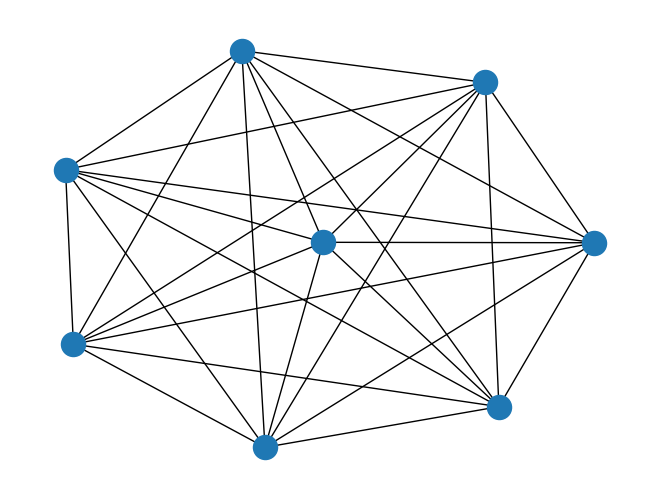

In [ ]:
nx.draw(nx.complete_graph(8))

In [ ]:
G= nx.Graph()

In [ ]:
G.add_node('a')

In [ ]:
G.add_node('b')

In [ ]:
G.add_edge('a', 'b')

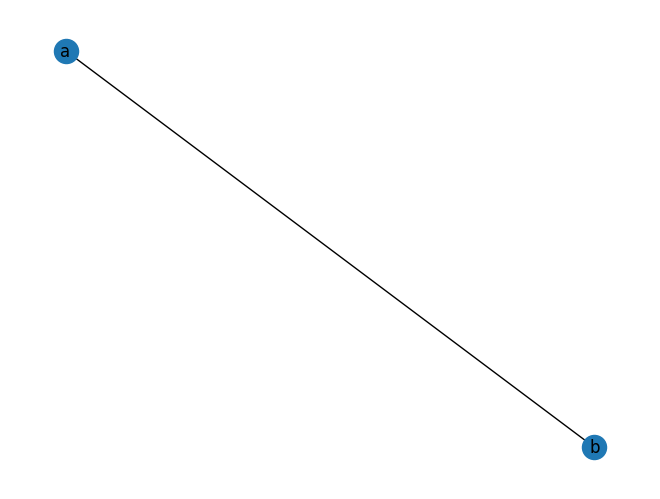

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
G.add_edge('a','c')

In [ ]:
G.add_edge('a','d')

In [ ]:
G.add_edge('d','c')

In [ ]:
G.add_edge('d','e')
G.add_edge('d','f')
G.add_edge('f','e')

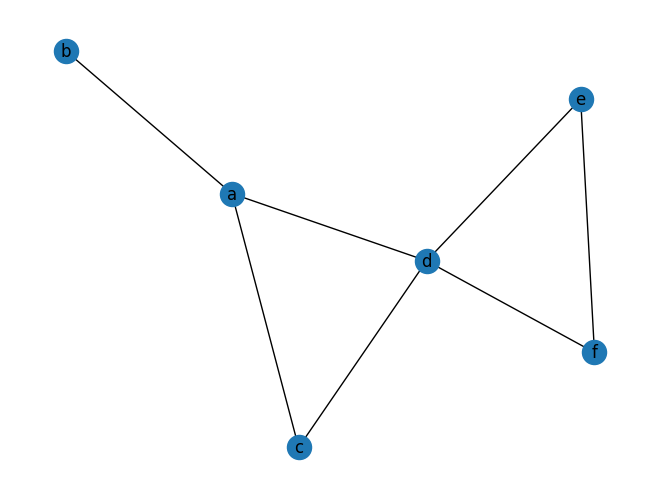

In [ ]:
nx.draw(G, with_labels=True)

###  Matriz de Adjacência simples

Em teoria dos grafos, a **matriz de adjacência** é uma matriz quadrada usada para representar um grafo finito. Os elementos da matriz indicam se os pares de vértices estão adjacentes ou não no grafo.

Para um grafo $G = (V, E)$ com $n$ vértices, a matriz de adjacência $A$ é uma matriz $n \times n$, onde o elemento $A_{ij}$ é definido como:

$$
A_{ij} =
\begin{cases}
1, & \text{se existe uma aresta do vértice } i \text{ para o vértice } j \\
0, & \text{caso contrário}
\end{cases}
$$


### Qual a matriz de adjacência do grafo anterior?

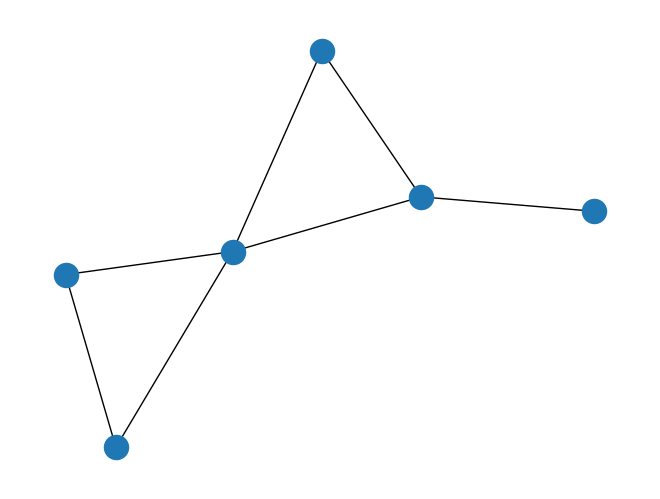

In [ ]:
nx.draw(nx.from_numpy_array(adj))

In [ ]:
adj= nx.adjacency_matrix(G).todense()

In [ ]:
check_symmetric(adj)

True

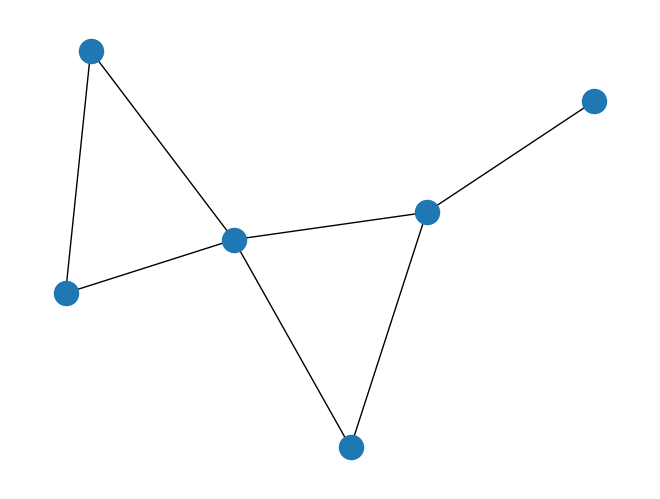

In [ ]:
nx.draw(nx.from_numpy_array(adj))

### Grafos direcionados

In [ ]:
DG = nx.DiGraph()

In [ ]:
DG.add_edge(0, 1)

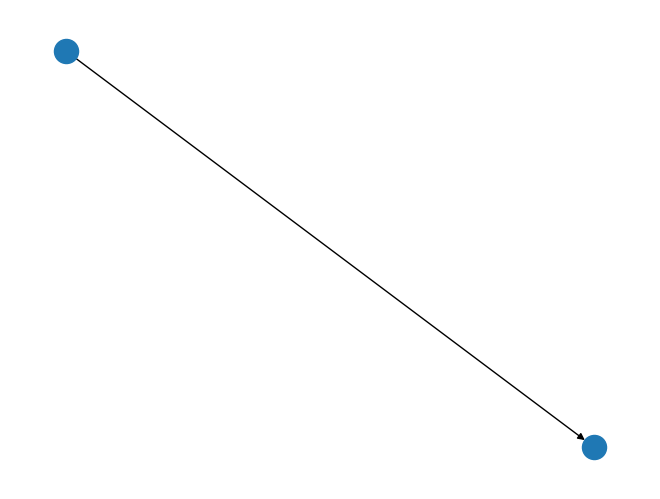

In [ ]:
nx.draw(DG)

In [ ]:
dir_adj= np.array([[0, 0, 0, 1], [1 , 0, 1, 1], [1 , 1, 0, 0], [1, 1, 1, 0]])

In [ ]:
DG = nx.from_numpy_array(dir_adj, create_using=nx.DiGraph)

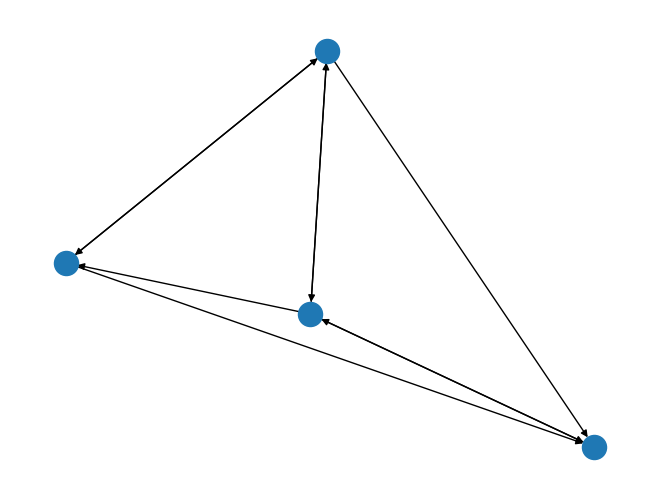

In [ ]:
nx.draw(DG)

### Que propriedade interessante as matrizes de adjacência tem? Em termos de dimensões

In [ ]:
adj.shape

(6, 6)

### As matrizes são quadradas, logo conseguimos calcular autovalores e autovetores

Qual dos métodos usamos para a matriz de adjacência do Grafo sem direção? Qual usamos para o Direcionado?


In [ ]:
print(np.linalg.eigh(adj))

EighResult(eigenvalues=array([-1.67828035, -1.31977475, -1.        ,  0.13966581,  1.22973801,
        2.62865128]), eigenvectors=array([[-5.56976856e-01,  4.79801529e-01, -4.90653893e-17,
         1.04627760e-01, -5.04696405e-01,  4.40342873e-01],
       [ 3.31873549e-01, -3.63548044e-01, -2.12527875e-17,
         7.49129373e-01, -4.10409698e-01,  1.67516656e-01],
       [-6.76901636e-02, -6.57086366e-01,  1.12802568e-16,
        -5.52695963e-01, -3.20634558e-01,  3.94177881e-01],
       [ 6.70579927e-01,  3.87404467e-01, -4.24843911e-17,
        -1.81820489e-01,  1.10399902e-01,  5.95813319e-01],
       [-2.50377048e-01, -1.67000898e-01,  7.07106781e-01,
         2.11337049e-01,  4.80546959e-01,  3.65832346e-01],
       [-2.50377048e-01, -1.67000898e-01, -7.07106781e-01,
         2.11337049e-01,  4.80546959e-01,  3.65832346e-01]]))


In [ ]:
print(len(np.linalg.eigh(adj)[1]))

6


In [ ]:
autovals , autovets = np.linalg.eig(dir_adj)

In [ ]:
print(autovals)

[ 2.14789904+0.j         -0.57394952+0.36898941j -0.57394952-0.36898941j
 -1.        +0.j        ]


In [ ]:
print(autovets)

[[ 2.84269464e-01+0.j          6.18573368e-01+0.j
   6.18573368e-01-0.j          9.77201126e-17+0.j        ]
 [ 6.10582109e-01+0.j         -3.55029886e-01+0.22824702j
  -3.55029886e-01-0.22824702j -7.07106781e-01+0.j        ]
 [ 4.16617149e-01+0.j         -1.43994983e-01-0.49025156j
  -1.43994983e-01+0.49025156j  7.07106781e-01+0.j        ]
 [ 6.10582109e-01+0.j         -3.55029886e-01+0.22824702j
  -3.55029886e-01-0.22824702j -4.44089210e-16+0.j        ]]


In [ ]:
print(len(autovets))

4


# Centralidade

Considere uma rede com um conjunto de nós $ N = \{1, \ldots, n\} $ e uma matriz de adjacência $ A = [a_{ij}]_{i,j \in N} $, onde $ a_{ij} = 1 $ indica uma conexão do nó $ i $ para o nó $ j $ e $ a_{ij} = 0 $ indica a ausência dessa conexão.

Desejamos uma medida da importância de um nó, onde um nó é considerado importante se outros nós importantes estiverem conectados a ele. Por exemplo, um website importante é aquele que muitos outros websites importantes linkam.

Para deixar mais claro, veja o nosso grafo anterior

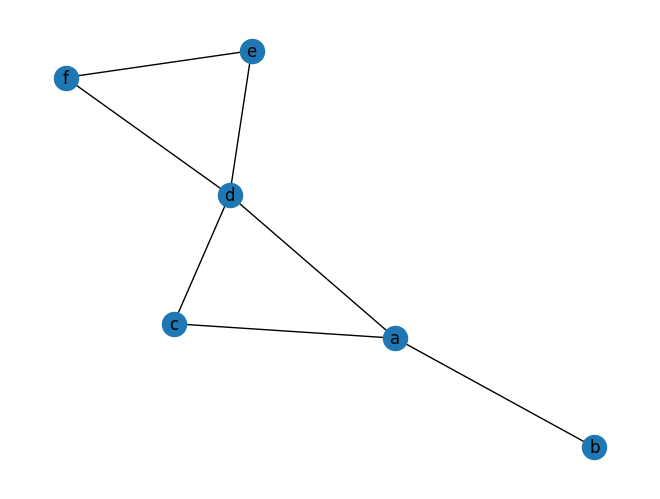

In [ ]:
nx.draw(G,with_labels=True)

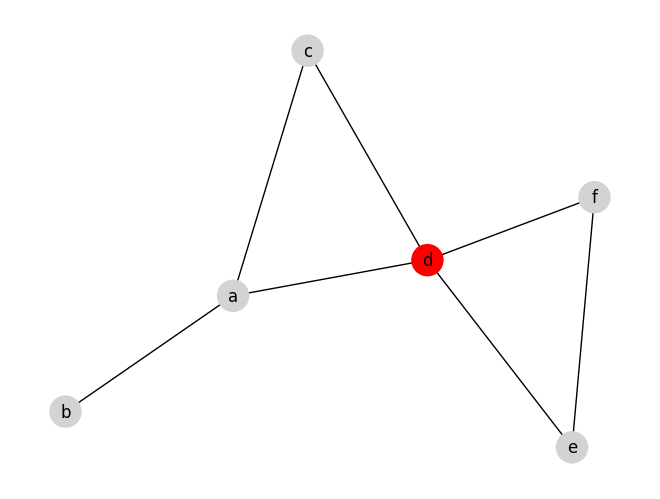

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


target_node = 'd'

targets= ['d', 'e']

node_colors = ['lightgray' if node not in targets else 'red' for node in G.nodes()]

nx.draw(G, with_labels=True, node_color=node_colors, node_size=500)

plt.show()


Fica claro, que esse nó tem uma propriedade interessante, que os outros não tem. Ele é um nó mais "central". É isso que iremos buscar quando trabalhamos com medidas de centralidade

### Degree Centrality

Uma dessas medidas é o grau. Ele é definido como o número de arestas de cada nó. Ou seja, o grau do nó `b` é 1, pois apenas uma aresta chega nele.

#### Ache no grafo não direcionado `G` os 2 nós com maior grau e plot com cores que os diferencia dos demais

In [ ]:
for i in range(len(G.nodes())):
    print(np.sum(adj[i]))

3
1
2
4
2
2


#### Faça o mesmo para o grafo direcionado, mas usando os conceitos de grau de saída(arestas saindo do vértice) e grau de entrada ( arestas chegando no vértice)

In [ ]:
for i in range(len(DG.nodes())):
    print(np.sum(dir_adj[:,i]))

3
2
2
2


In [ ]:
print(dir_adj)

[[0 0 0 1]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 1 0]]


In [ ]:
for i in range(len(DG.nodes())):
  print(dir_adj[i,:])

[0 0 0 1]
[1 0 1 1]
[1 1 0 0]
[1 1 1 0]


In [ ]:
for i in range(len(DG.nodes())):
  print(dir_adj[:,i])

[0 1 1 1]
[0 0 1 1]
[0 1 0 1]
[1 1 0 0]


In [ ]:
for i in range(len(DG.nodes())):
    print(np.sum(dir_adj[i,:]))

1
3
2
3


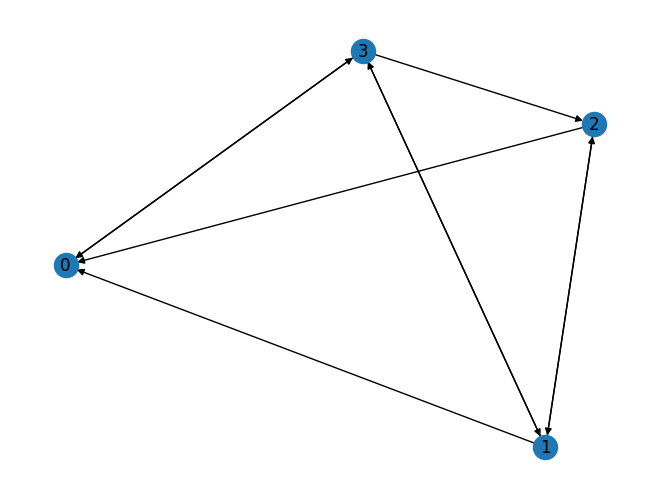

In [ ]:
nx.draw(DG, with_labels=True)

## Eigenvector Centrality



A medida é a **centralidade de "autovetor"**: um vetor não nulo $ c = (c_i)_{i \in N} $ tal que, para algum escalar $ \lambda > 0 $:

$$
\lambda c_i = \sum_{j \neq i} a_{ij} c_j \quad \text{para todo } i \in N.
$$

Isto é, a centralidade de cada nó $ i $ é proporcional à soma das centralidades de seus vizinhos.


### Interpretação
Quando nós “importantes” ou “prestigiados” estão conectados a você, isso te torna importante/prestigiado também. As equações permanecem válidas se multiplicarmos $ c $ por um escalar, então normalmente normalizamos $ c $ para que $ \sum_{i \in N} c_i = 1 $.

## Exemplo
Suponha $ n = 3 $ e a matriz de adjacência:

$$
A = \begin{bmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{bmatrix}
$$

A eigenvector centrality (com a normalização $ \sum_{i \in N} c_i = 1 $) é definida como a solução do sistema de equações:

$$
\begin{align*}
\lambda c_1 &= c_2 + c_3 \\
\lambda c_2 &= c_1 + c_3 \\
\lambda c_3 &= c_1 + c_2 \\
c_1 + c_2 + c_3 &= 1.
\end{align*}
$$

Resolvendo esse sistema, obtemos:

$$
\lambda = 2, \quad c_1 = c_2 = c_3 =  \frac{1}{3}.
$$




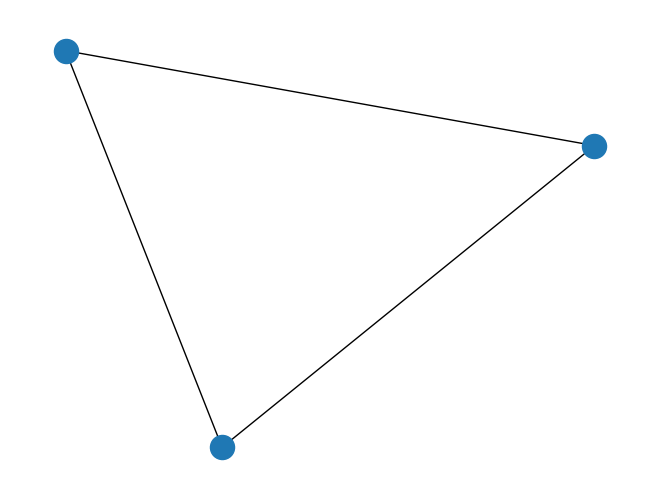

In [ ]:
nx.draw(nx.complete_graph(3))

Em notação matricial, a equação para o eigenvector centrality pode ser escrita como:

$$
\lambda c = A c,
$$

onde $ \lambda $ é um escalar (o maior autovalor), $ c $ é um vetor coluna, $ n \times 1 $, e $ A $ é a  matriz de adjacência de tamanho $ n \times n $.

Em outras palavras, $ c $ é um autovetor de $ A $, com $ \lambda $ sendo o autovalor correspondente.

De acordo com o **Teorema de Perron-Frobenius** da álgebra linear, para toda matriz irredutível e não-negativa, o maior autovalor é positivo, e os componentes do autovetor correspondente também são todos positivos. Isso implica que a equação $ \lambda c = A c $ tem uma solução positiva: $ \lambda $ é o maior autovalor de $ A $, e $ c $ é o autovetor correspondente.



Centralidade de Grau:
Nó 0: 0.429
Nó 1: 0.429
Nó 2: 0.429
Nó 3: 0.571
Nó 4: 0.571
Nó 5: 0.429
Nó 6: 0.429
Nó 7: 0.429

Centralidade de Autovetor:
Nó 0: 0.326
Nó 1: 0.326
Nó 2: 0.326
Nó 3: 0.425
Nó 4: 0.425
Nó 5: 0.326
Nó 6: 0.326
Nó 7: 0.326


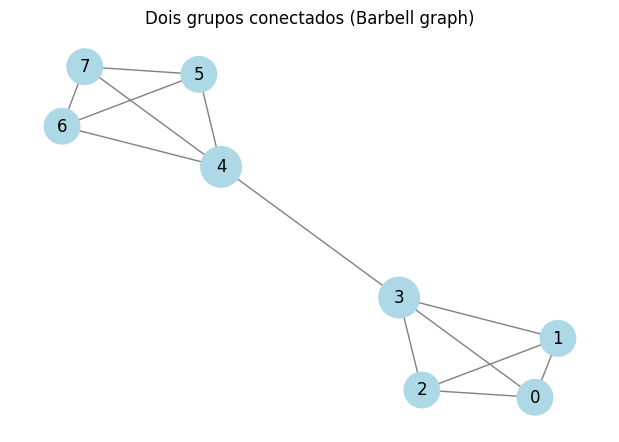

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Dois grupos densamente conectados com uma única ligação entre eles
G = nx.barbell_graph(4, 0)  # dois K4 ligados por uma aresta

eig = nx.eigenvector_centrality(G)
deg = nx.degree_centrality(G)

print("Centralidade de Grau:")
for node, val in deg.items():
    print(f"Nó {node}: {val:.3f}")

print("\nCentralidade de Autovetor:")
for node, val in eig.items():
    print(f"Nó {node}: {val:.3f}")

# Visualização
plt.figure(figsize=(6,4))
pos = nx.spring_layout(G, seed=2)
nx.draw(G, pos, with_labels=True,
        node_size=[v*2000 for v in eig.values()],
        node_color="lightblue", edge_color="gray")
plt.title("Dois grupos conectados (Barbell graph)")
plt.show()


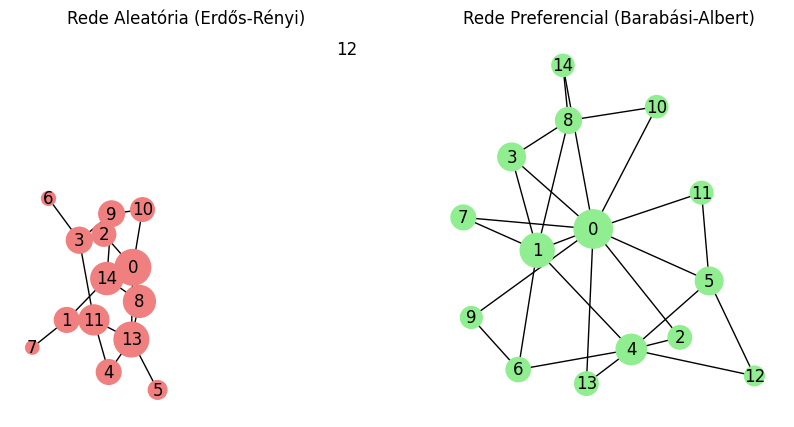

In [ ]:
# Rede aleatória Erdős-Rényi
ER = nx.erdos_renyi_graph(15, 0.2, seed=42)

# Rede scale-free (modelo Barabási-Albert)
BA = nx.barabasi_albert_graph(15, 2, seed=42)

eig_ER = nx.eigenvector_centrality(ER)
eig_BA = nx.eigenvector_centrality(BA)

# Visualização lado a lado
fig, axes = plt.subplots(1,2, figsize=(10,5))

nx.draw(ER, nx.spring_layout(ER, seed=1), with_labels=True,
        node_size=[v*1500 for v in eig_ER.values()],
        node_color="lightcoral", ax=axes[0])
axes[0].set_title("Rede Aleatória (Erdős-Rényi)")

nx.draw(BA, nx.spring_layout(BA, seed=1), with_labels=True,
        node_size=[v*1500 for v in eig_BA.values()],
        node_color="lightgreen", ax=axes[1])
axes[1].set_title("Rede Preferencial (Barabási-Albert)")

plt.show()


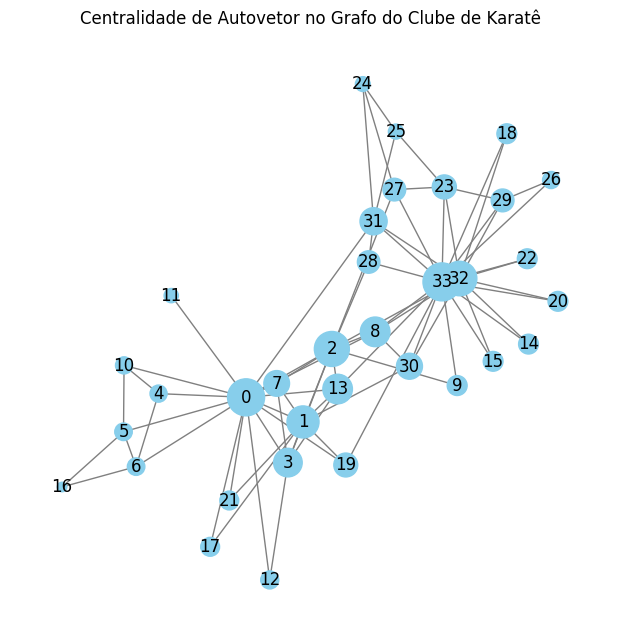

Nó 33: 0.373
Nó 0: 0.355
Nó 2: 0.317
Nó 32: 0.309
Nó 1: 0.266


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Rede do clube de karatê de Zachary (grafo clássico)
karate = nx.karate_club_graph()

# Centralidade de autovetor
eig_karate = nx.eigenvector_centrality(karate)

# Visualização
plt.figure(figsize=(6,6))
pos = nx.spring_layout(karate, seed=123)
nx.draw(karate, pos, with_labels=True,
        node_size=[v*2000 for v in eig_karate.values()],
        node_color="skyblue", edge_color="gray")
plt.title("Centralidade de Autovetor no Grafo do Clube de Karatê")
plt.show()

# Exibir valores numéricos
for node, val in sorted(eig_karate.items(), key=lambda x: -x[1])[:5]:
    print(f"Nó {node}: {val:.3f}")


## Abaixo, algumas definições formais e o enunciado do Teorema de Perron-Frobenius

## <font color='blue'>Matrizes Positivas</font>

Uma matriz $n\times n$ onde todas as entradas são positivas, isto é $A_{ij}>0$, $\forall i,j$, é chamada de _matriz positiva_ e denotada por $\mathbf{A}>0$.

**OBS**: Não confunda a definição de matriz positiva com a definição matriz definida positiva.

**Raio Espectral**: O raio espectral de uma matriz $\mathbf{A}$ é definido como:

$$
\rho(\mathbf{A})=\max\{|\lambda|, \lambda \mbox{ autovalor de } \mathbf{A}\}
$$

*Limitantes para o Raio Espectral*

Seja $\mathbf{A}$ uma matriz $n\times n$ positiva, $r_i = \sum_k a_{ik}$ (soma dos elementos da linha $i$) e  $c_j = \sum_k a_{kj}$ (soma dos elementos da coluna $j$). Então temos:

$$
\min_i r_i \leq \rho(\mathbf{A}) \leq \max_i r_i\\
\min_j c_j \leq \rho(\mathbf{A}) \leq \max_j c_j
$$

*Normalização do Raio Espectral*

Podemos sempre normalizar uma matriz positiva de modo que seu raio espectral seja 1, pois, $\mathbf{A}x=\lambda x \rightarrow \frac{1}{\lambda}\mathbf{A}x=x$ logo $\rho(\mathbf{A})=r\Longrightarrow\rho(\mathbf{A}/r)=1$.

### Teorema de Perron:
Se $\mathbf{A}>0$ então $\rho(\mathbf{A})$ é um autovalor e o autovetor correspondente é positivo, ou seja, $\mathbf{A}$ possui um autopar da forma $(\rho(\mathbf{A}),\mathbf{v})$, onde $\mathbf{v}>0$. Além disso,

- $\rho(\mathbf{A})$ é o único autovalor no círculo espectral de $\mathbf{A}$, ou seja, $\forall$ autovalor $\lambda\neq\rho(\mathbf{A})$, $|\lambda|<\rho(\mathbf{A})$.


**OBS:** $\rho(\mathbf{A})\in \mathbb{R}$

**Demonstração**: [Meyer, C.D. 2001] Capítulo 8 (uma prova alternativa pode ser encontrata [aqui](https://iuuk.mff.cuni.cz/~rakdver/linalg/lesson15-9.pdf)).

Cinco maiores autovalores em valor absoluto:
 [15.37042151+0.j          1.19951249+0.89145847j  1.19951249-0.89145847j
 -0.42176019+1.37035066j -0.42176019-1.37035066j]

Autovetor associado ao raio espectra:
 [-0.18605074+0.j -0.17695415+0.j -0.14421311+0.j -0.18704045+0.j
 -0.17575582+0.j -0.1849769 +0.j -0.17988513+0.j -0.15367135+0.j
 -0.19387719+0.j -0.21441475+0.j -0.18286521+0.j -0.18910105+0.j
 -0.18339075+0.j -0.14183764+0.j -0.18068757+0.j -0.18447779+0.j
 -0.15936573+0.j -0.18578743+0.j -0.13329989+0.j -0.17781191+0.j
 -0.20422541+0.j -0.20274122+0.j -0.17270506+0.j -0.16686511+0.j
 -0.20629053+0.j -0.19646047+0.j -0.19521921+0.j -0.1665501 +0.j
 -0.22061875+0.j -0.19637121+0.j]


Text(-5, -7, 'disco espectral')

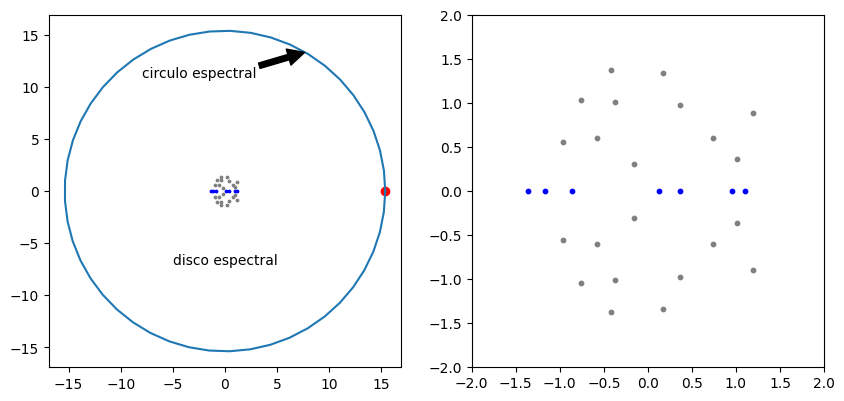

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.random.uniform(0.01,1.0,size=(30,30))

e_val, e_vec = np.linalg.eig(A)
print('Cinco maiores autovalores em valor absoluto:\n',e_val[:5])
print('\nAutovetor associado ao raio espectra:\n',e_vec[:,0])

p_eval = [(x.real,x.imag) for x in e_val]
id_max = np.argmax(np.abs(e_val))
e_val_max = np.abs(e_val[id_max])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10, 5))
ax[0].set_aspect('equal')

t = np.linspace(0,6.28,50)
ax[0].plot(e_val_max*np.cos(t),e_val_max*np.sin(t))

for x,y in p_eval:
    if np.abs(y) > 1.0e-7:
        ax[0].scatter(x,y,color='gray',s=3)
    else:
        ax[0].scatter(x,y,color='blue',s=3)

ax[0].scatter(p_eval[id_max][0],p_eval[id_max][1],color='red')

ax[1].set_aspect('equal')
ax[1].set(xlim=(-2, 2), ylim=(-2, 2), autoscale_on=False)
for x,y in p_eval:
    if np.abs(y) > 1.0e-7:
        ax[1].scatter(x,y,color='gray',s=10)
    else:
        ax[1].scatter(x,y,color='blue',s=10)

ax[0].annotate('circulo espectral',xy=(e_val_max*np.cos(np.pi/3),e_val_max*np.sin(np.pi/3)),
                xytext=(-8,e_val_max*np.sin(np.pi/4)),arrowprops=dict(facecolor='black', shrink=0.01))

ax[0].text(-5,-7,'disco espectral')

#### Multiplicidade Algébrica e Geométrica
A multiplicidade algébrica de um autovalor $\lambda$, denotada $multalg(\lambda)$, é o número de vezes que $\lambda$ aparece como raíz do polinômio $\det(\mathbf{A}-\lambda \mathbf{I})$.

A multiplicidade geométrica de um autovalor $\lambda$, denotada $multgeo(\lambda)$, é a dimensão do núcleo da transformação $(\mathbf{A}-\lambda \mathbf{I})$.

### Propriedade 1:
Se $\mathbf{A}>0$ então $multalg(\rho(\mathbf{A}))=multgeo(\rho(\mathbf{A}))=1$.

**Demonstração**: [Meyer, C.D. 2001] Capítulo 8

A propriedade 2 garante que o autovetor $\mathbf{v}$ associado ao autovalor $r=\rho(\mathbf{A})$ é único. O vetor $\mathbf{p}=\frac{\mathbf{v}}{\|\mathbf{v}\|_1}$ ($\mathbf{v}$ dividido pela soma dos elementos de $\mathbf{v}$) é chamado de **vetor de Perron** da matriz $\mathbf{A}$ e o par $(r,\mathbf{p})$ é chamado de **autopar de Perron**.

Note que, $\mathbf{A}>0\rightarrow\mathbf{A}^\top>0$ e como $\mathbf{A}$ e $\mathbf{A}^\top$ possuem os mesmos autovalores, então $r=\rho(\mathbf{A})$ é autovalor de $\mathbf{A}^T$.

Assim, temos que
$$\mathbf{A}^\top\mathbf{q}=r\mathbf{q}\Longrightarrow \mathbf{q}^\top\mathbf{A}=r\mathbf{q}^\top$$

Se $\mathbf{q}$ for normalizado como o vetor $\mathbf{p}$, então o vetor $\mathbf{q}^\top$ é chamado de **vetor de Perron à esquerda** da matriz $\mathbf{A}$.

**OBS**: Por definição, $\mathbf{p}=[p_1,\ldots,p_n]$, $\sum_i p_i = 1$

## <font color='blue'>Matrizes Não-Negativas</font>

Vamos analisar agora a possibilidade de que a matriz admita entradas iguais a zero, ou seja, uma matriz $\mathbf{A}$ é não-negativa se $\mathbf{A}\geq 0$.

Neste caso, não é difícil mostrar que:

- $r=\rho(\mathbf{A})$ é autovalor de $\mathbf{A}$ (porém $r=0$ é possível)
- $\mathbf{A}\mathbf{v}=r\mathbf{v}$ para algum $\mathbf{v}\in\mathcal{N}=\{\mathbf{x}|\mathbf{x}\geq 0, \mathbf{x}\neq 0\}$

**OBS**: Além do fato de $r=0$ ser possível e do autovetor associado a $r$ ser não-negativo (ao invés de positivo), sem hipóteses adicionais, as seguintes propridades de matrizes positivas deixam de valer para matrizes não-negativa:

- A multiplicidade algébrica e geométrica de $r$ pode não ser 1
- $r$ pode não ser o único autovalor no circulo espectral de $\mathbf{A}$

In [ ]:
import numpy as np
from scipy.sparse.linalg import eigs as eigs

In [ ]:
A = np.random.uniform(0,1,size=(10,10))

A[np.random.randint(0,10,5),np.random.randint(0,10,5)] = 0.0
#print(A)

lbda, v = eigs(A,k=5,which='LM')
print(lbda)

for i in lbda:
    print(np.linalg.norm(i))

[ 4.71987883+0.j          0.64066348-0.86710336j  0.64066348+0.86710336j
  0.90983459+0.j         -0.65235989-0.09689852j]
4.719878825817855
1.0781085005114852
1.0781085005114852
0.90983459257166
0.6595170549904503


## <font color='blue'>Matrizes Redutíveis</font>
Uma matriz não-negativa $\mathbf{A}$ é dita _redutível_ se existe uma matriz de permutação $\mathbf{P}$ tal que

$$
\mathbf{P}^\top\mathbf{A}\mathbf{P} =
\begin{bmatrix}
\mathbf{X} & \mathbf{Y}\\
0 & \mathbf{W}
\end{bmatrix}
$$

Caso contrário a matriz é chamada _irredutível_. A transformação $\mathbf{P}^\top\mathbf{A}\mathbf{P}$ troca a posição de linhas e colunas com mesmo índice.

In [ ]:
import numpy as np

A = np.asarray([[2,0],[3,4]])
P = np.asarray([[0,1],[1,0]])

print('A=\n',A)
print('\nP=\n',P)

print('\nP.T A P=\n',np.dot(P.T,np.dot(A,P)))

A=
 [[2 0]
 [3 4]]

P=
 [[0 1]
 [1 0]]

P.T A P=
 [[4 3]
 [0 2]]


### Grafo associado a matriz Não-Negativa

Uma **matriz não-negativa** $\mathbf{A}$ $n\times n$ pode ser associada a um **grafo dirigido** $\mathcal{G}(\mathbf{A})$ com $n$ vértices $\{v_1,\ldots,v_n\}$ no qual uma aresta saindo do vértice $v_i$ para o vértice $v_j$ se e só se $A_{ij}>0$.

- $\mathcal{G}(\mathbf{P}^\top\mathbf{A}\mathbf{P}) = \mathcal{G}(\mathbf{A})$, uma vez que a permutação tem apenas o efeito de reindexar os vértices.
- $\mathcal{G}(\mathbf{A})$ é dita _fortemente connectado_ se para qualquer par de vértices $v_i$ e $v_j$ existe um caminho dirigido saindo de $v_i$ e chegando em $v_j$.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 10
idr = np.random.randint(0,n,15)
idc = np.random.randint(0,n,15)
A = np.zeros((n,n))
A[idr,idc] = 1
print(A)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]]


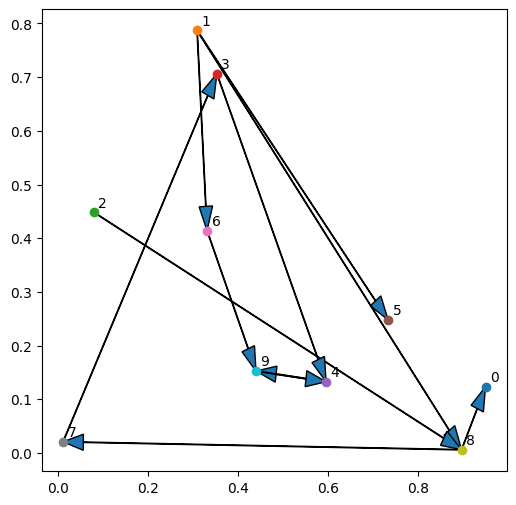

In [ ]:
edges = np.where(A > 0)
X = np.random.uniform(0,1,size=(n,2))

f,ax = plt.subplots(figsize=(6,6))
for i in zip(edges[0],edges[1]):
    dx = np.array([X[i[1],0]-X[i[0],0],X[i[1],1]-X[i[0],1]])
    ax.arrow(X[i[0],0],X[i[0],1],dx[0],dx[1],head_width=0.03,length_includes_head=True)

eps = 0.01
for i in range(n):
    ax.scatter(X[i,0],X[i,1])
    ax.text(X[i,0]+eps,X[i,1]+eps,str(i))

### Propriedade 2:
Uma matriz não-negativa $\mathbf{A}$ é irredutível se e só se $\mathcal{G}(\mathbf{A})$ é fortemente connectado.

### <font color='blue'>Teorema de Perron-Frobenius</font>
Seja $\mathbf{A}$ uma matriz não-negativa irredutível, então $\mathbf{A}$ tem as seguintes propriedades:

- $r=\rho(\mathbf{A})$, $r>0$ é autovalor de $\mathbf{A}$<br><br>

- $multalg(r)=multgeo(r)=1$<br><br>

- O autovetor $\mathbf{A}\mathbf{p}=r\mathbf{p}$, $\mathbf{p}>0$, $\|\mathbf{p}\|_1=1$ é único (vetor de Perron)

**OBS**:

1. A única propriedade de matriz positiva não assegurada por uma matriz irredutível é a unicidade de $r$ no círuclo espectral. Porém, se $\mathbf{A}$ é irredutível, temos que $multalg(r)=1$.

2. Outra questão importante é como verificar se uma matriz é irredutível

## <font color='blue'>Matrizes Primitivas</font>
Uma matriz não-negativa irredutível que contém apenas um autovalor $r=\rho(\mathbf{A})$ no seu círculo espectral é chamada _matriz primitiva_, caso contrário a matriz é chamada _imprimitiva_.

### Propriedade 4: (teste de Frobenius)
Uma matriz $\mathbf{A}\geq 0$ é primitiva se e só se $\mathbf{A}^m>0$ para algum $m$.